In [1]:
import json
from pathlib import Path

import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hyperparam_dir = Path('../output/adam/')
keep_percentile = 0.2

In [3]:
all_results = []

for trial_dir in hyperparam_dir.iterdir():
    if not trial_dir.is_dir():
        continue
    try:
        with (trial_dir / 'config.json').open() as f:
            trial_results = json.load(f)
        with (trial_dir / 'val_loss.txt').open() as f:
            trial_results['val_loss'] = float(f.read())
        all_results.append(trial_results)
    except FileNotFoundError:
        continue

all_results = pd.DataFrame(all_results).drop_duplicates()

In [4]:
best_results = all_results.groupby(['bert_model', 'random_seed'], as_index=False) \
    .apply(lambda x: x.nsmallest(int(keep_percentile * x.shape[0]), 'val_loss'))

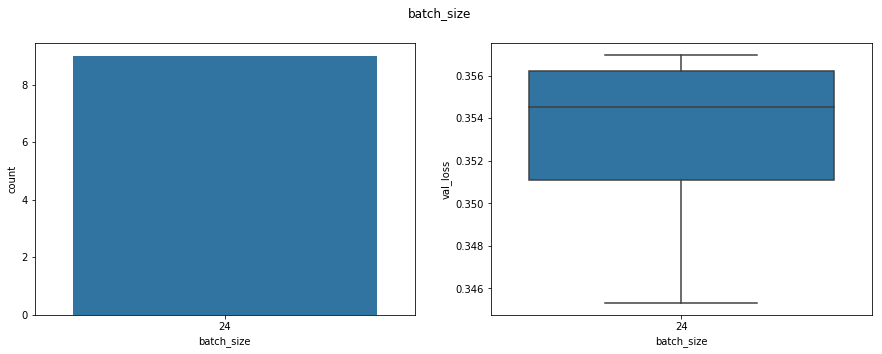

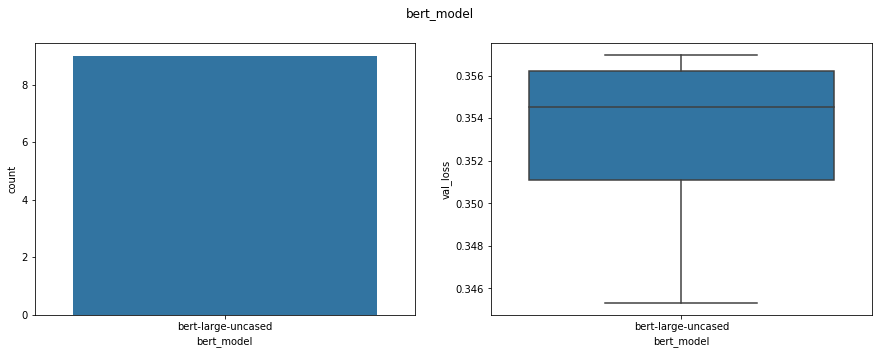

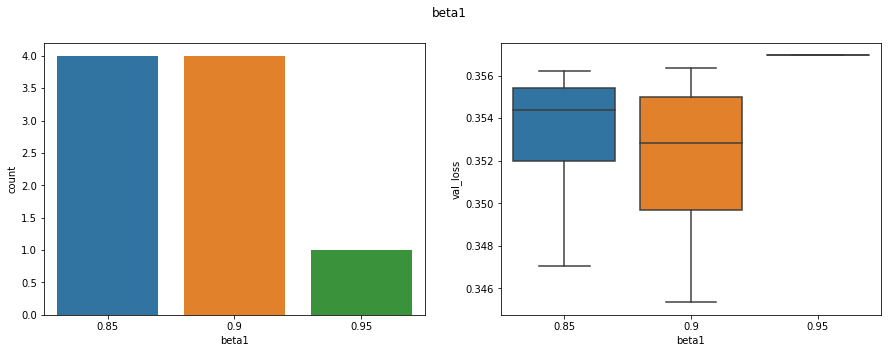

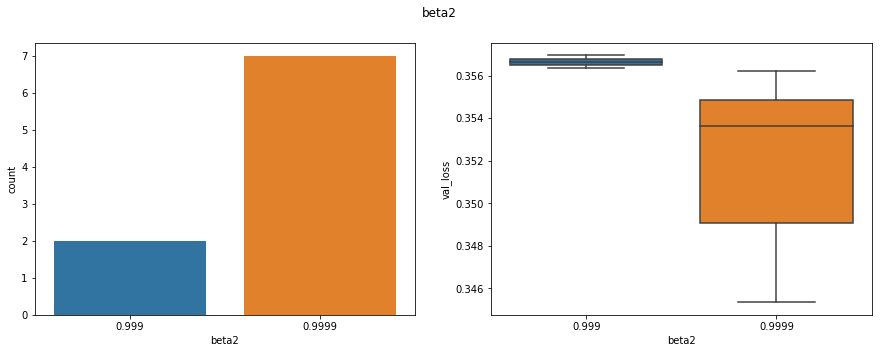

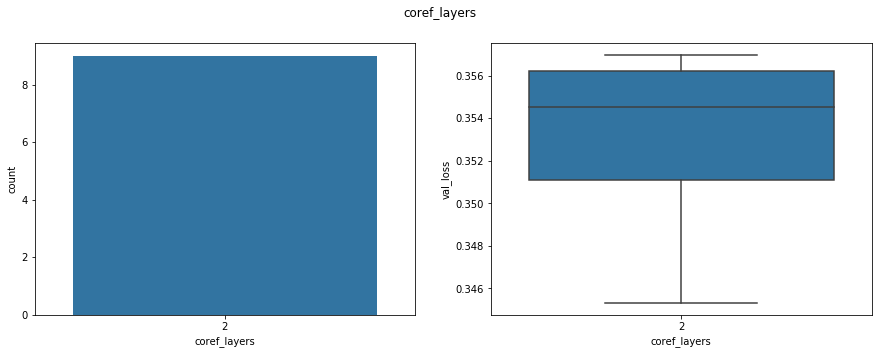

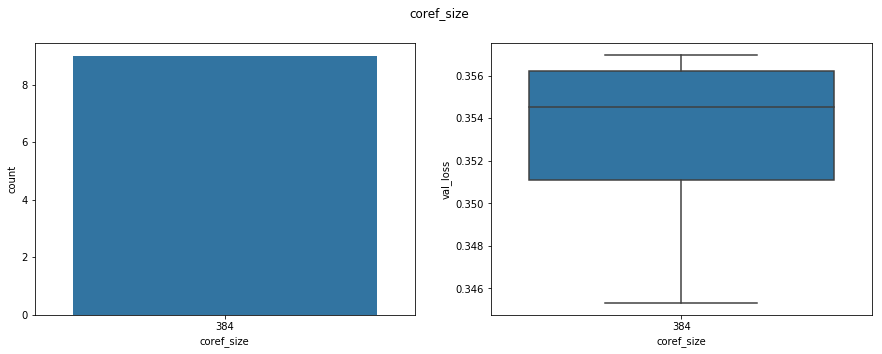

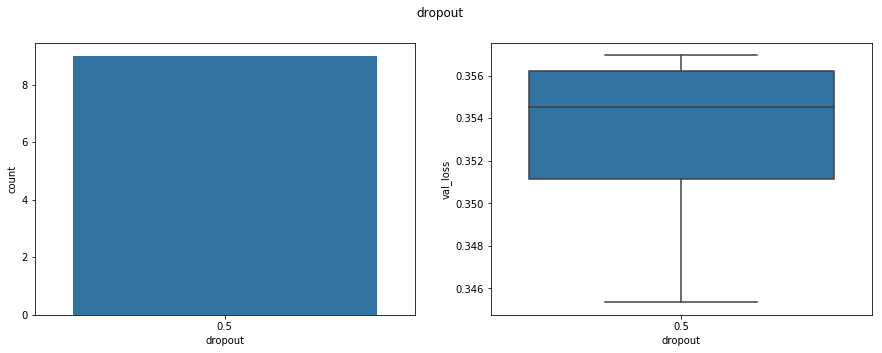

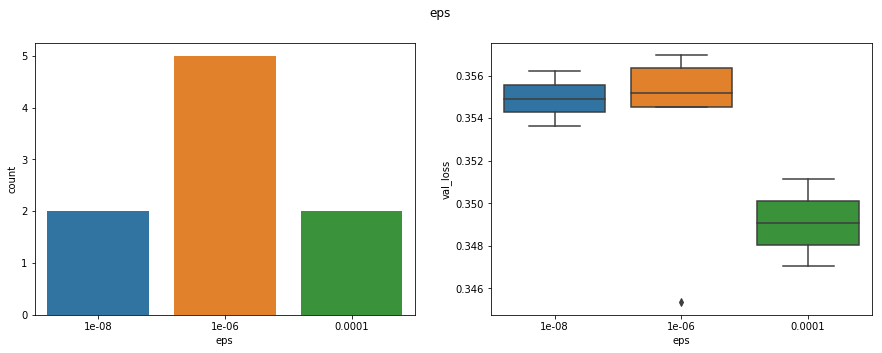

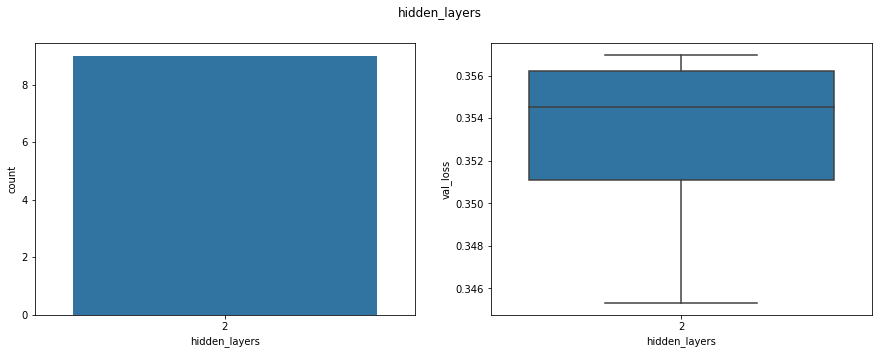

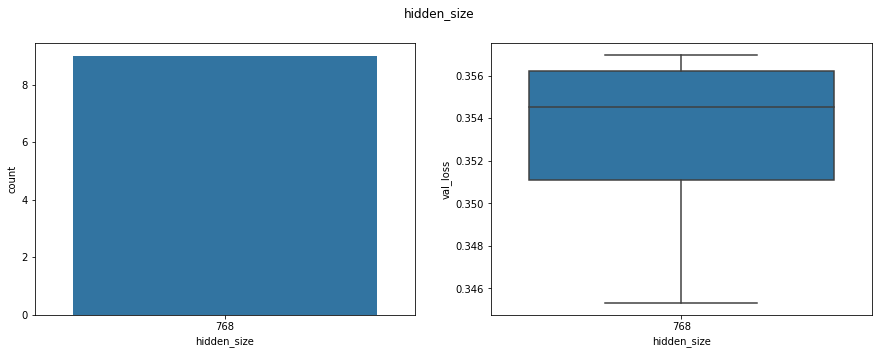

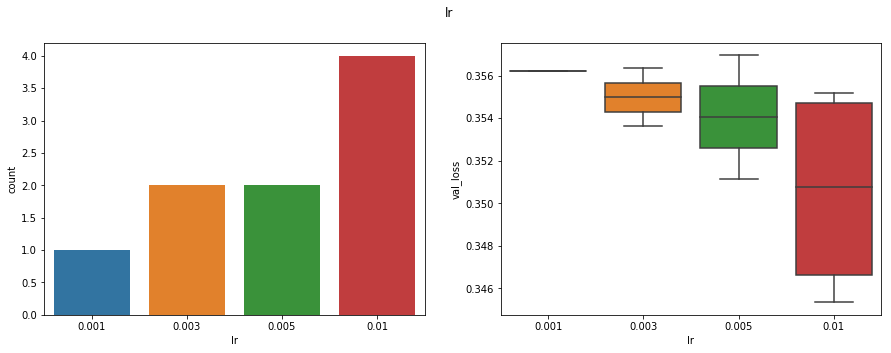

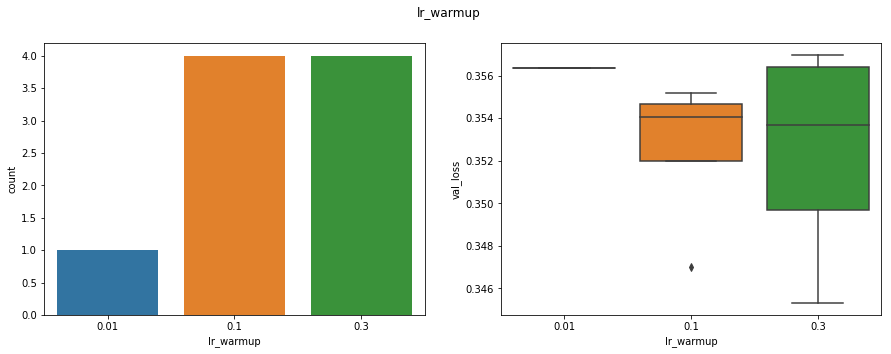

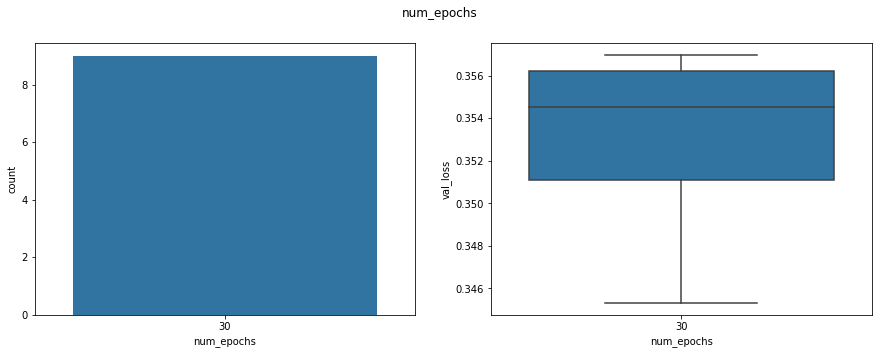

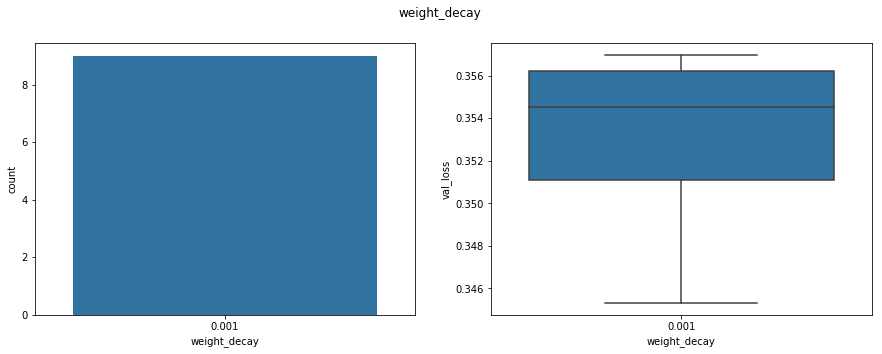

In [5]:
fig_count = 0
for param in best_results.columns:
    if param in {'val_loss', 'random_seed'}:
        continue
    fig_count += 1
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(param)
    sns.catplot(x=param, kind='count', ax=axes[0], data=best_results)
    sns.catplot(x=param, y='val_loss', kind='box', ax=axes[1], data=best_results)
    plt.close(fig_count + 1)
    plt.close(fig_count + 2)